# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import config as cfg
os.environ['NEPTUNE_API_TOKEN'] = cfg.NEPTUNE_API_TOKEN    
    
import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer

# Start Experiment Runner

In [3]:
req = cts.ICAO_REQ.HAIR_EYES
ds = GTName.FVC
aligned = True

kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': f'Training network for {req.value.upper()} requisite',
        'tags': ['vgg16', 'ground truths', 'adamax', ds.value.lower(), 'binary_output', req.value.lower()],
        'src_files': ['exp_runner.py', 'data_processor.py', 'model_trainer.py', 'model_evaluator.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        #'reqs': list(cts.ICAO_REQ),
        'reqs': [req],
        'aligned': aligned,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [ds]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'model_name': '',
        'sample_training_data': False,
        'sample_prop': 1.
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 10,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'train_prop': 0.9,
        'validation_prop': 0.05,
        'test_prop': 0.05,
        'validation_split': 0.1,
        'dropout': 0.3
    }
}

runner = ExperimentRunner(**kwargs)

-----
Use Neptune:  True
-----
Args: 
{'exp_params': {'description': 'Training network for VEIL requisite',
                'name': 'train_vgg16',
                'src_files': ['exp_runner.py',
                              'data_processor.py',
                              'model_trainer.py',
                              'model_evaluator.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'fvc',
                         'binary_output',
                         'veil']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fcd783f2c10>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 10,
                      'optimizer': <Optimizer.ADAMAX: 'Adamax'>,
             

# Load Data

In [4]:
runner.load_training_data()

Loading data
Loading GT FVC...
..Ignoring 19 empty label values
Input data.shape: (5761, 4)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

Starting data generators
Found 4926 validated image filenames belonging to 2 classes.
Found 547 validated image filenames belonging to 2 classes.
Found 288 validated image filenames belonging to 2 classes.
TOTAL: 5761


# Labels Distribution

In [8]:
runner.summary_labels_dist()

Requisite: VEIL
N_TRAIN_VALID_COMP: 5126 (93.66%)
N_TRAIN_VALID_NOT_COMP: 347 (6.34%)
N_TRAIN_VALID_DUMMY: 0 (0.0%)
N_TEST_COMP: 271 (94.1%)
N_TEST_NOT_COMP: 17 (5.9%)
N_TEST_DUMMY: 0 (0.0%)
----


In [9]:
runner.summary_gen_labels_dist()

N_TRAIN_COMP: 311 (6.31%)
N_TRAIN_NON_COMP: 311 (93.69%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALID_COMP: 36 (6.58%)
N_VALID_NON_COMP: 511 (93.42%)
N_VALID_DUMMY: 0 (0.0%)
N_TEST_COMP: 17 (5.9%)
N_TEST_NON_COMP: 271 (94.1%)
N_TEST_DUMMY: 0 (0.0%)


# Use Neptune

In [10]:
runner.start_neptune()
runner.create_experiment()

Starting Neptune


Creating experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training/e/IC-197


# Create Model

In [11]:
runner.create_model()

Creating model...
Model created


# Vizualize Model

# Training Model

In [12]:
runner.train_model()

Training VGG16 network
Epoch 1/10
76/76 [==============================] - 58s 656ms/step - loss: 0.1955 - accuracy: 0.9259 - val_loss: 0.0293 - val_accuracy: 0.9941
Epoch 2/10
76/76 [==============================] - 43s 564ms/step - loss: 0.0386 - accuracy: 0.9931 - val_loss: 0.0191 - val_accuracy: 0.9941
Epoch 3/10
76/76 [==============================] - 42s 555ms/step - loss: 0.0213 - accuracy: 0.9967 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 4/10
76/76 [==============================] - 42s 557ms/step - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.0073 - val_accuracy: 0.9980
Epoch 5/10
76/76 [==============================] - 43s 563ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/10
76/76 [==============================] - 43s 567ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 4.6987e-04 - val_accuracy: 1.0000
Epoch 7/10
76/76 [==============================] - 43s 569ms/step - loss: 0.0100 - accuracy: 0.9981 - val_loss: 6.

# Plots

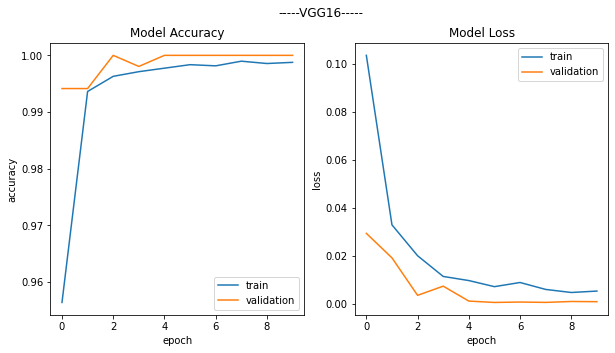

In [13]:
runner.draw_training_history()

# Load Best Model

In [14]:
runner.load_best_model()

..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [15]:
runner.save_model()

Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
..Saving model to neptune..
Model saved into Neptune
Saving process finished


# Test Trained Model

Testing Trained Model
Predicting labels....
5/5 [==============================] - 8s 2s/step
Prediction finished!
Requisite: VEIL


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


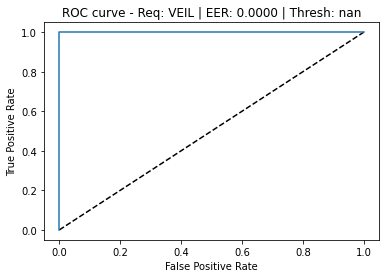

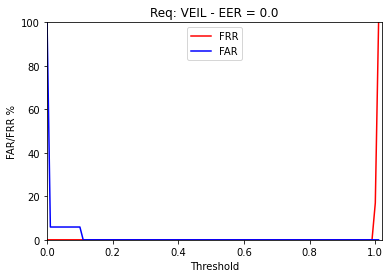

Requisite: ICAO_REQ.VEIL - EER: 0.0% - Best Threshold: nan
Classification report -----------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.94      1.00      0.97       271

    accuracy                           0.94       288
   macro avg       0.47      0.50      0.48       288
weighted avg       0.89      0.94      0.91       288

Accuracy ------------------------------------------------
Model Accuracy: 94.1%
---------------------------------------------------------
Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | TP: 271 | TN: 0 | FP: 17 | FN: 0


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Invalid metric value: nan for channel best_th. Metrics with nan or +/-inf values will not be sent to server


In [16]:
runner.test_model()

# Vizualize Model Classification

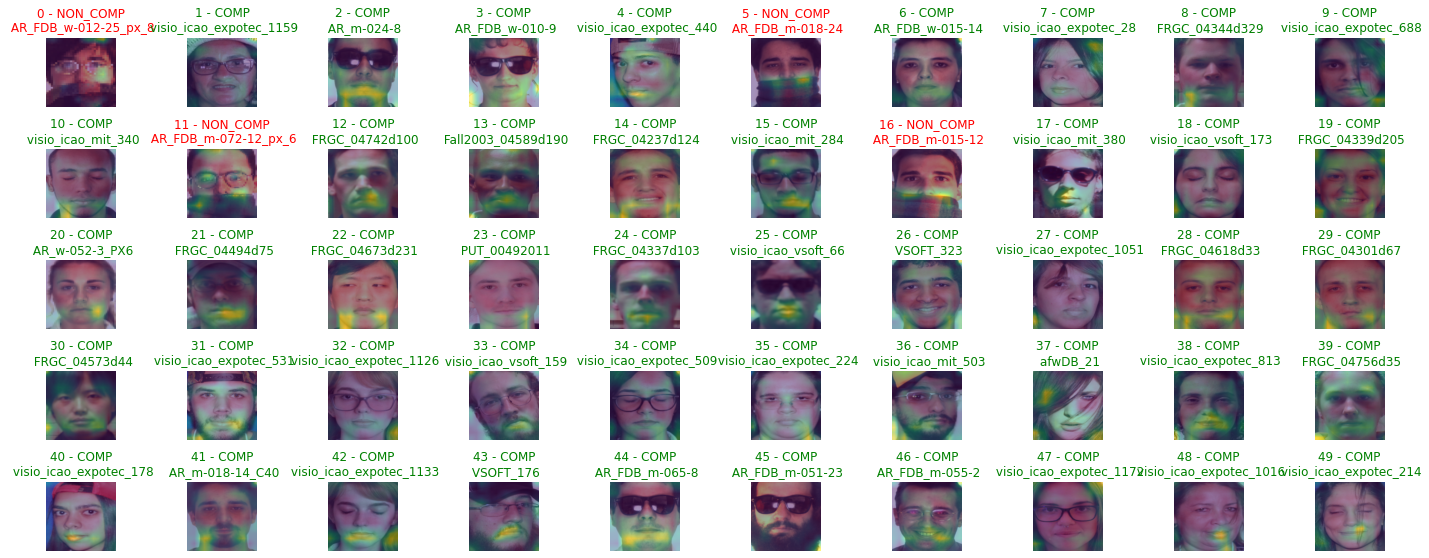

In [17]:
runner.vizualize_predictions(n_imgs=50)

## False Positives

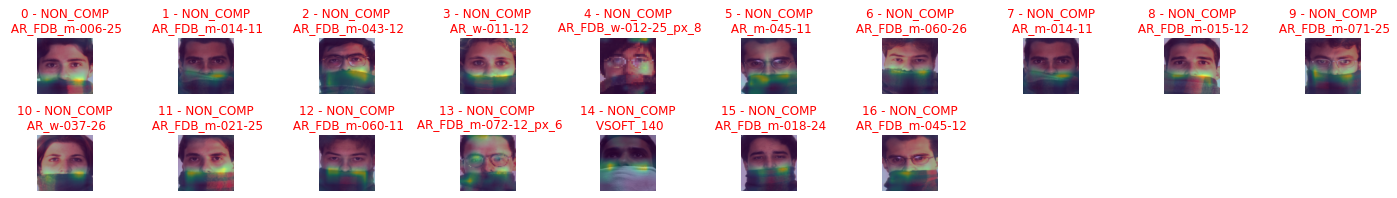

In [18]:
runner.vizualize_predictions(n_imgs=50, show_only_fp=True)

## False Negatives

ValueError: not enough values to unpack (expected 3, got 0)

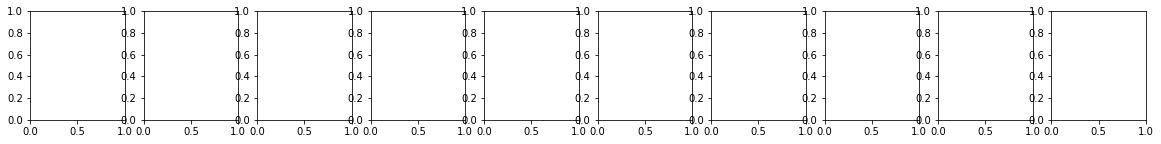

In [19]:
runner.vizualize_predictions(n_imgs=50, show_only_fn=True)

## True Positives

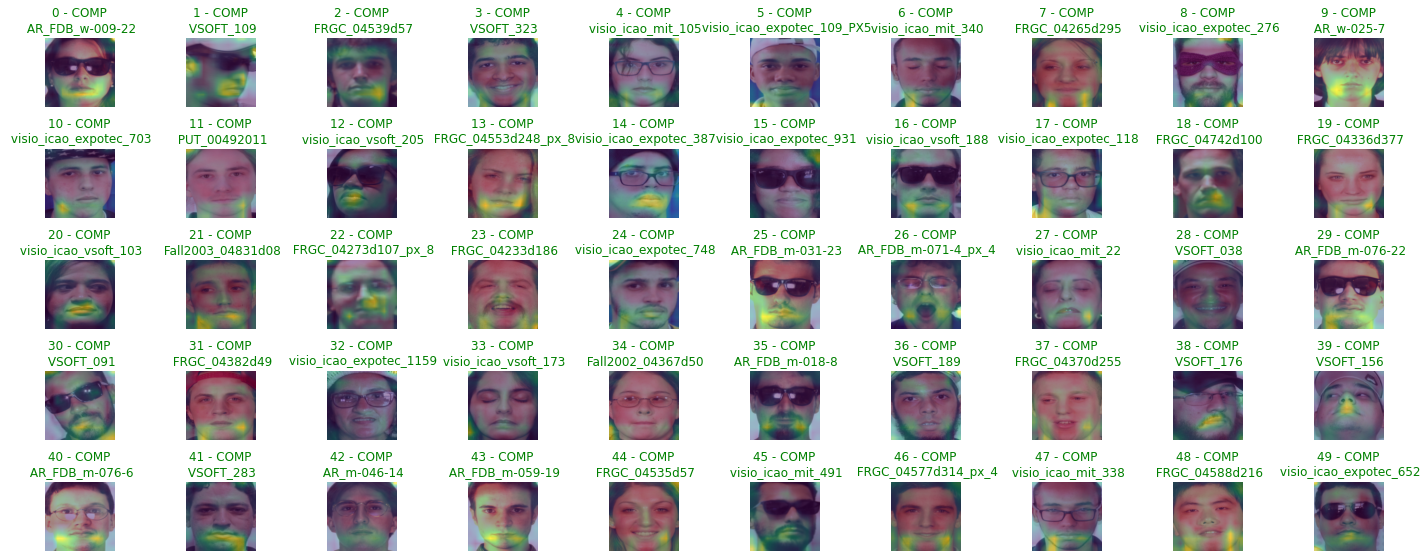

In [20]:
runner.vizualize_predictions(n_imgs=50, show_only_tp=True)

## True Negatives

ValueError: not enough values to unpack (expected 3, got 0)

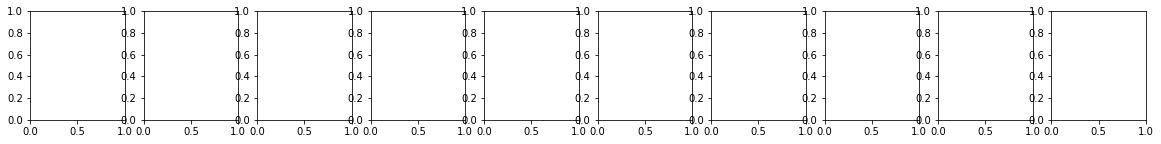

In [21]:
runner.vizualize_predictions(n_imgs=50, show_only_tn=True)

# Finishing Experiment Manager

In [22]:
runner.finish_experiment()

Finishing Neptune
